# ML Project : Image Recognition - LEGO classification

import libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import PIL
import tensorflow as tf
from sklearn.metrics import classification_report,accuracy_score
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.python.keras import backend as K
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.utils.np_utils import to_categorical

In [2]:
import pathlib
data_dir=pathlib.Path('dataset/')
file_paths = list(data_dir.glob(r'**/*.png'))
file_paths = [str(x) for x in file_paths]
df = pd.DataFrame({'Filepath':file_paths})
df

,Filepath
0,dataset\14719 flat tile corner 2x2 000L.png
1,dataset\14719 flat tile corner 2x2 000R.png
2,dataset\14719 flat tile corner 2x2 001L.png
3,dataset\14719 flat tile corner 2x2 001R.png
4,dataset\14719 flat tile corner 2x2 002L.png
...,...
39995,dataset\99301 roof tile inside 3x3 397R.png
39996,dataset\99301 roof tile inside 3x3 398L.png
39997,dataset\99301 roof tile inside 3x3 398R.png
39998,dataset\99301 roof tile inside 3x3 399L.png


In [3]:
image_count = len(list(file_paths))
print(image_count)

40000


In [4]:
def classes(string):
    string  = ' '.join(string.split('/')[-1].replace('.png', '').split(' ')[1:-1])
    string = string.lower()
    return string

In [5]:
df['Class'] = df['Filepath'].apply(lambda x: classes(x))
df

,Filepath,Class
0,dataset\14719 flat tile corner 2x2 000L.png,flat tile corner 2x2
1,dataset\14719 flat tile corner 2x2 000R.png,flat tile corner 2x2
2,dataset\14719 flat tile corner 2x2 001L.png,flat tile corner 2x2
3,dataset\14719 flat tile corner 2x2 001R.png,flat tile corner 2x2
4,dataset\14719 flat tile corner 2x2 002L.png,flat tile corner 2x2
...,...,...
39995,dataset\99301 roof tile inside 3x3 397R.png,roof tile inside 3x3
39996,dataset\99301 roof tile inside 3x3 398L.png,roof tile inside 3x3
39997,dataset\99301 roof tile inside 3x3 398R.png,roof tile inside 3x3
39998,dataset\99301 roof tile inside 3x3 399L.png,roof tile inside 3x3


In [6]:
len(df['Filepath'].unique())

40000

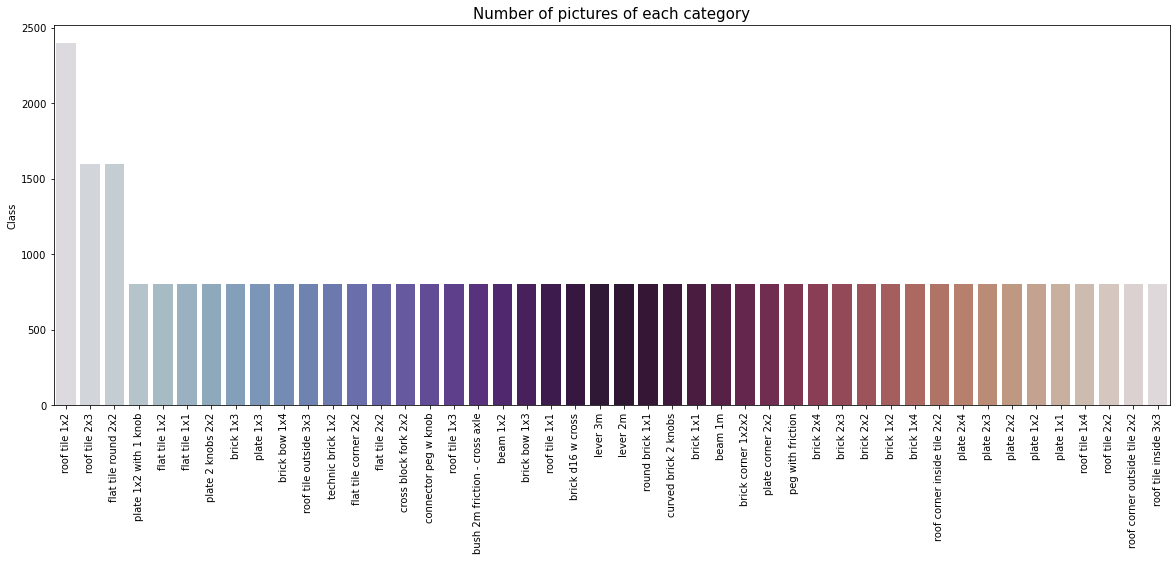

In [7]:
# Display the number of pictures of each category
count = df['Class'].value_counts()
plt.figure(figsize=(20,7))
sns.barplot(x = count.index, y = count, palette = "twilight")
plt.title("Number of pictures of each category", fontsize = 15)
plt.xticks(rotation=90)
plt.show()

In [8]:
count

roof tile 1x2                    2400
roof tile 2x3                    1600
flat tile round 2x2              1600
plate 1x2 with 1 knob             800
flat tile 1x2                     800
flat tile 1x1                     800
plate 2 knobs 2x2                 800
brick 1x3                         800
plate 1x3                         800
brick bow 1x4                     800
roof tile outside 3x3             800
technic brick 1x2                 800
flat tile corner 2x2              800
flat tile 2x2                     800
cross block fork 2x2              800
connector peg w knob              800
roof tile 1x3                     800
bush 2m friction - cross axle     800
beam 1x2                          800
brick bow 1x3                     800
roof tile 1x1                     800
brick d16 w cross                 800
lever 3m                          800
lever 2m                          800
round brick 1x1                   800
curved brick 2 knobs              800
brick 1x1   

In [9]:
validation = pd.read_csv('validation.txt', names = ['Filepath'])
validation['Filepath'] = validation['Filepath'].apply(lambda x: 'dataset/' + x)
validation

,Filepath
0,dataset/14719 flat tile corner 2x2 000R.png
1,dataset/14719 flat tile corner 2x2 000L.png
2,dataset/14719 flat tile corner 2x2 001R.png
3,dataset/14719 flat tile corner 2x2 001L.png
4,dataset/14719 flat tile corner 2x2 002R.png
...,...
7995,dataset/99301 roof tile inside 3x3 077L.png
7996,dataset/99301 roof tile inside 3x3 078R.png
7997,dataset/99301 roof tile inside 3x3 078L.png
7998,dataset/99301 roof tile inside 3x3 079R.png


In [10]:
df['Filepath']=df['Filepath'].str.replace(r'\\', '/')
df['validation_set'] = df['Filepath'].isin(validation['Filepath'])
df

C:\Users\tapak\AppData\Local\Temp/ipykernel_11304/1159283512.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Filepath']=df['Filepath'].str.replace(r'\\', '/')


,Filepath,Class,validation_set
0,dataset/14719 flat tile corner 2x2 000L.png,flat tile corner 2x2,True
1,dataset/14719 flat tile corner 2x2 000R.png,flat tile corner 2x2,True
2,dataset/14719 flat tile corner 2x2 001L.png,flat tile corner 2x2,True
3,dataset/14719 flat tile corner 2x2 001R.png,flat tile corner 2x2,True
4,dataset/14719 flat tile corner 2x2 002L.png,flat tile corner 2x2,True
...,...,...,...
39995,dataset/99301 roof tile inside 3x3 397R.png,roof tile inside 3x3,False
39996,dataset/99301 roof tile inside 3x3 398L.png,roof tile inside 3x3,False
39997,dataset/99301 roof tile inside 3x3 398R.png,roof tile inside 3x3,False
39998,dataset/99301 roof tile inside 3x3 399L.png,roof tile inside 3x3,False


In [11]:
df['validation_set'].value_counts()

False    32000
True      8000
Name: validation_set, dtype: int64

In [12]:
train_df = df[df['validation_set'] == False]
test_df = df[df['validation_set'] == True]

In [13]:
print('Number of pictures in the train set :', train_df.shape[0])
print('Number of pictures in the test set :', test_df.shape[0])

Number of pictures in the train set : 32000
Number of pictures in the test set : 8000


In [14]:
train_df

,Filepath,Class,validation_set
160,dataset/14719 flat tile corner 2x2 080L.png,flat tile corner 2x2,False
161,dataset/14719 flat tile corner 2x2 080R.png,flat tile corner 2x2,False
162,dataset/14719 flat tile corner 2x2 081L.png,flat tile corner 2x2,False
163,dataset/14719 flat tile corner 2x2 081R.png,flat tile corner 2x2,False
164,dataset/14719 flat tile corner 2x2 082L.png,flat tile corner 2x2,False
...,...,...,...
39995,dataset/99301 roof tile inside 3x3 397R.png,roof tile inside 3x3,False
39996,dataset/99301 roof tile inside 3x3 398L.png,roof tile inside 3x3,False
39997,dataset/99301 roof tile inside 3x3 398R.png,roof tile inside 3x3,False
39998,dataset/99301 roof tile inside 3x3 399L.png,roof tile inside 3x3,False


In [15]:
test_df

,Filepath,Class,validation_set
0,dataset/14719 flat tile corner 2x2 000L.png,flat tile corner 2x2,True
1,dataset/14719 flat tile corner 2x2 000R.png,flat tile corner 2x2,True
2,dataset/14719 flat tile corner 2x2 001L.png,flat tile corner 2x2,True
3,dataset/14719 flat tile corner 2x2 001R.png,flat tile corner 2x2,True
4,dataset/14719 flat tile corner 2x2 002L.png,flat tile corner 2x2,True
...,...,...,...
39355,dataset/99301 roof tile inside 3x3 077R.png,roof tile inside 3x3,True
39356,dataset/99301 roof tile inside 3x3 078L.png,roof tile inside 3x3,True
39357,dataset/99301 roof tile inside 3x3 078R.png,roof tile inside 3x3,True
39358,dataset/99301 roof tile inside 3x3 079L.png,roof tile inside 3x3,True


In [16]:
train_test_df_count={'Train':train_df['Class'].value_counts(),'Test':test_df['Class'].value_counts()}
train_test_df_count=pd.DataFrame(train_test_df_count)
train_test_df_count

,Train,Test
roof tile 1x2,1920,480
roof tile 2x3,1280,320
flat tile round 2x2,1280,320
plate 1x2 with 1 knob,640,160
flat tile 1x2,640,160
flat tile 1x1,640,160
plate 2 knobs 2x2,640,160
brick 1x3,640,160
plate 1x3,640,160
brick bow 1x4,640,160


In [17]:
train_df1=train_df.loc[train_df['Class']=='roof tile 1x2']
train_df2=train_df.loc[train_df['Class']=='roof tile 2x3']
train_df3=train_df.loc[train_df['Class']=='flat tile round 2x2']
train_df1=train_df1.iloc[:640,:]
train_df2=train_df2.iloc[:640,:]
train_df3=train_df3.iloc[:640,:]
train_df = train_df.loc[train_df['Class'] != 'roof tile 1x2']
train_df = train_df.loc[train_df['Class'] != 'roof tile 2x3']
train_df = train_df.loc[train_df['Class'] != 'flat tile round 2x2']
real=[train_df1,train_df2,train_df3,train_df]
train_df=pd.concat(real)
train_df

,Filepath,Class,validation_set
960,dataset/15672 roof tile 1x2 080L.png,roof tile 1x2,False
961,dataset/15672 roof tile 1x2 080R.png,roof tile 1x2,False
962,dataset/15672 roof tile 1x2 081L.png,roof tile 1x2,False
963,dataset/15672 roof tile 1x2 081R.png,roof tile 1x2,False
964,dataset/15672 roof tile 1x2 082L.png,roof tile 1x2,False
...,...,...,...
39995,dataset/99301 roof tile inside 3x3 397R.png,roof tile inside 3x3,False
39996,dataset/99301 roof tile inside 3x3 398L.png,roof tile inside 3x3,False
39997,dataset/99301 roof tile inside 3x3 398R.png,roof tile inside 3x3,False
39998,dataset/99301 roof tile inside 3x3 399L.png,roof tile inside 3x3,False


In [18]:
test_df1=test_df.loc[test_df['Class']=='roof tile 1x2']
test_df2=test_df.loc[test_df['Class']=='roof tile 2x3']
test_df3=test_df.loc[test_df['Class']=='flat tile round 2x2']
test_df1=test_df1.iloc[:160,:]
test_df2=test_df2.iloc[:160,:]
test_df3=test_df3.iloc[:160,:]
test_df = test_df.loc[test_df['Class'] != 'roof tile 1x2']
test_df = test_df.loc[test_df['Class'] != 'roof tile 2x3']
test_df = test_df.loc[test_df['Class'] != 'flat tile round 2x2']
real=[test_df1,test_df2,test_df3,test_df]
test_df=pd.concat(real)
test_df

,Filepath,Class,validation_set
800,dataset/15672 roof tile 1x2 000L.png,roof tile 1x2,True
801,dataset/15672 roof tile 1x2 000R.png,roof tile 1x2,True
802,dataset/15672 roof tile 1x2 001L.png,roof tile 1x2,True
803,dataset/15672 roof tile 1x2 001R.png,roof tile 1x2,True
804,dataset/15672 roof tile 1x2 002L.png,roof tile 1x2,True
...,...,...,...
39355,dataset/99301 roof tile inside 3x3 077R.png,roof tile inside 3x3,True
39356,dataset/99301 roof tile inside 3x3 078L.png,roof tile inside 3x3,True
39357,dataset/99301 roof tile inside 3x3 078R.png,roof tile inside 3x3,True
39358,dataset/99301 roof tile inside 3x3 079L.png,roof tile inside 3x3,True


In [19]:
train_test_df_count={'Train':train_df['Class'].value_counts(),'Test':test_df['Class'].value_counts()}
train_test_df_count=pd.DataFrame(train_test_df_count)
train_test_df_count

,Train,Test
roof tile 1x2,640,160
plate 1x2 with 1 knob,640,160
flat tile 2x2,640,160
flat tile 1x2,640,160
flat tile 1x1,640,160
plate 2 knobs 2x2,640,160
brick 1x3,640,160
plate 1x3,640,160
brick bow 1x4,640,160
roof tile outside 3x3,640,160


In [20]:
num_classes=len(train_df['Class'].unique())

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
model = Sequential()
model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(50, 50, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(46, activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 8)         224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 8)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 25, 25, 8)        32        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 16)       0         
 2D)                                                             
                                                        

In [22]:
model.compile(loss='categorical_crossentropy', # binary_crossentropy or categorical_crossentropy  
              optimizer='adam',# rmsprop or adagrad or  #adam
              metrics=['accuracy'])

In [23]:
train_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Class',
    target_size=(50, 50),
    color_mode='rgb',
    batch_size = 32,
    shuffle=True,
    seed=0,
    #subset='training',
    class_mode='categorical',
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest") #binary # categorical


print(train_generator.class_indices)

Found 29440 validated image filenames belonging to 46 classes.
{'beam 1m': 0, 'beam 1x2': 1, 'brick 1x1': 2, 'brick 1x2': 3, 'brick 1x3': 4, 'brick 1x4': 5, 'brick 2x2': 6, 'brick 2x3': 7, 'brick 2x4': 8, 'brick bow 1x3': 9, 'brick bow 1x4': 10, 'brick corner 1x2x2': 11, 'brick d16 w cross': 12, 'bush 2m friction - cross axle': 13, 'connector peg w knob': 14, 'cross block fork 2x2': 15, 'curved brick 2 knobs': 16, 'flat tile 1x1': 17, 'flat tile 1x2': 18, 'flat tile 2x2': 19, 'flat tile corner 2x2': 20, 'flat tile round 2x2': 21, 'lever 2m': 22, 'lever 3m': 23, 'peg with friction': 24, 'plate 1x1': 25, 'plate 1x2': 26, 'plate 1x2 with 1 knob': 27, 'plate 1x3': 28, 'plate 2 knobs 2x2': 29, 'plate 2x2': 30, 'plate 2x3': 31, 'plate 2x4': 32, 'plate corner 2x2': 33, 'roof corner inside tile 2x2': 34, 'roof corner outside tile 2x2': 35, 'roof tile 1x1': 36, 'roof tile 1x2': 37, 'roof tile 1x3': 38, 'roof tile 1x4': 39, 'roof tile 2x2': 40, 'roof tile 2x3': 41, 'roof tile inside 3x3': 42, 'r

In [24]:
test_datagen = ImageDataGenerator(rescale=1./ 255)

test_generator =  test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Class',
    color_mode='rgb',
    target_size=(50, 50),
    batch_size = 32,
    shuffle=False,
    class_mode='categorical') #binary # categorical

print(test_generator.class_indices)

Found 7360 validated image filenames belonging to 46 classes.
{'beam 1m': 0, 'beam 1x2': 1, 'brick 1x1': 2, 'brick 1x2': 3, 'brick 1x3': 4, 'brick 1x4': 5, 'brick 2x2': 6, 'brick 2x3': 7, 'brick 2x4': 8, 'brick bow 1x3': 9, 'brick bow 1x4': 10, 'brick corner 1x2x2': 11, 'brick d16 w cross': 12, 'bush 2m friction - cross axle': 13, 'connector peg w knob': 14, 'cross block fork 2x2': 15, 'curved brick 2 knobs': 16, 'flat tile 1x1': 17, 'flat tile 1x2': 18, 'flat tile 2x2': 19, 'flat tile corner 2x2': 20, 'flat tile round 2x2': 21, 'lever 2m': 22, 'lever 3m': 23, 'peg with friction': 24, 'plate 1x1': 25, 'plate 1x2': 26, 'plate 1x2 with 1 knob': 27, 'plate 1x3': 28, 'plate 2 knobs 2x2': 29, 'plate 2x2': 30, 'plate 2x3': 31, 'plate 2x4': 32, 'plate corner 2x2': 33, 'roof corner inside tile 2x2': 34, 'roof corner outside tile 2x2': 35, 'roof tile 1x1': 36, 'roof tile 1x2': 37, 'roof tile 1x3': 38, 'roof tile 1x4': 39, 'roof tile 2x2': 40, 'roof tile 2x3': 41, 'roof tile inside 3x3': 42, 'ro

In [25]:
epochs = 30

history =model.fit(train_generator,
                   epochs=epochs,
                   validation_data=test_generator,
                   callbacks=[tf.keras.callbacks.EarlyStopping(
                       monitor='val_loss',
                       patience=3,
                       restore_best_weights=True)]
                  )

Epoch 1/30
920/920 [==============================] - 367s 399ms/step - loss: 2.8668 - accuracy: 0.1604 - val_loss: 2.1883 - val_accuracy: 0.3039
Epoch 2/30
920/920 [==============================] - 118s 128ms/step - loss: 2.2453 - accuracy: 0.2775 - val_loss: 1.8620 - val_accuracy: 0.3846
Epoch 3/30
920/920 [==============================] - 117s 127ms/step - loss: 1.9734 - accuracy: 0.3487 - val_loss: 1.5635 - val_accuracy: 0.4875
Epoch 4/30
920/920 [==============================] - 119s 129ms/step - loss: 1.8091 - accuracy: 0.3918 - val_loss: 1.4587 - val_accuracy: 0.5143
Epoch 5/30
920/920 [==============================] - 106s 115ms/step - loss: 1.6661 - accuracy: 0.4308 - val_loss: 1.3483 - val_accuracy: 0.5473
Epoch 6/30
920/920 [==============================] - 110s 119ms/step - loss: 1.5694 - accuracy: 0.4591 - val_loss: 1.5606 - val_accuracy: 0.5143
Epoch 7/30
920/920 [==============================] - 119s 130ms/step - loss: 1.4872 - accuracy: 0.4856 - val_loss: 1.2510 -

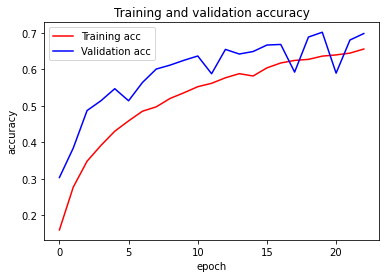

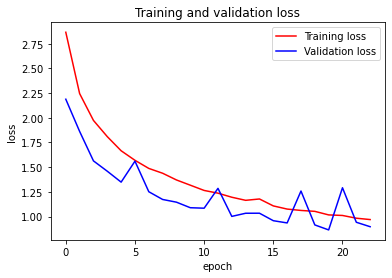

In [26]:
#Graphing our training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

In [57]:
pred = model.predict(test_generator)
pred = np.argmax(pred,axis=1)
print(pred)
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]



# Get the accuracy on the test set
y_test = list(test_df.Class)
acc = accuracy_score(y_test,pred)

df_pred=pd.DataFrame({'y_test':y_test,'y_pred':pred})
display(df_pred)

[37 37 37 ... 42 42  5]


,y_test,y_pred
0,roof tile 1x2,roof tile 1x2
1,roof tile 1x2,roof tile 1x2
2,roof tile 1x2,roof tile 1x2
3,roof tile 1x2,roof tile 1x2
4,roof tile 1x2,roof tile 1x2
...,...,...
7355,roof tile inside 3x3,roof tile inside 3x3
7356,roof tile inside 3x3,roof tile inside 3x3
7357,roof tile inside 3x3,roof tile inside 3x3
7358,roof tile inside 3x3,roof tile inside 3x3


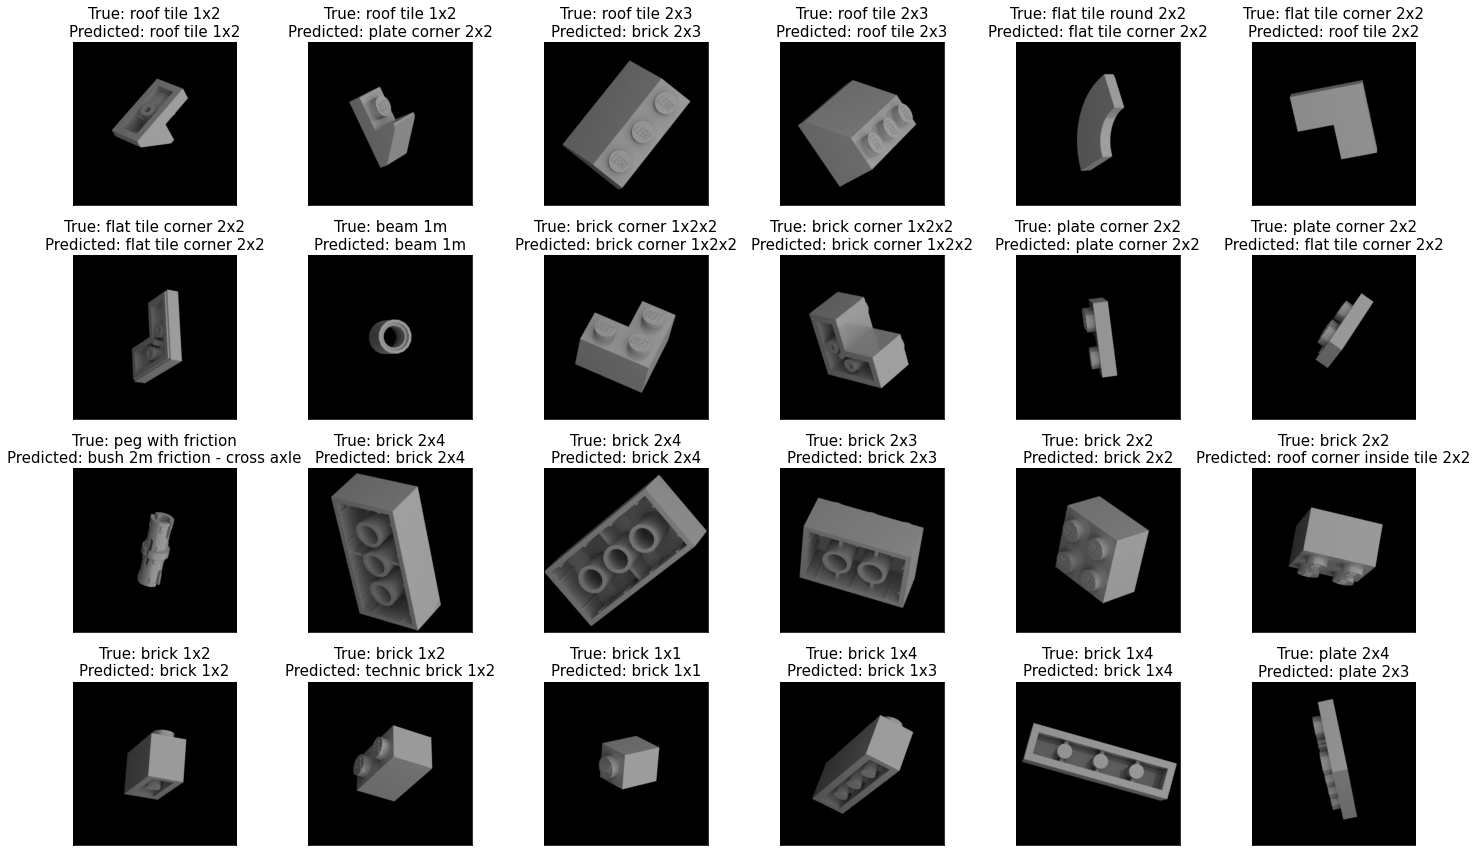

In [44]:
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(20, 12),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[i*100]))
    ax.set_title(f"True: {test_df.Class.iloc[i*100].split('_')[0]}\nPredicted: {pred[i*100].split('_')[0]}", fontsize = 15)
plt.tight_layout()
plt.show()

In [28]:
print(acc)

0.7020380434782608


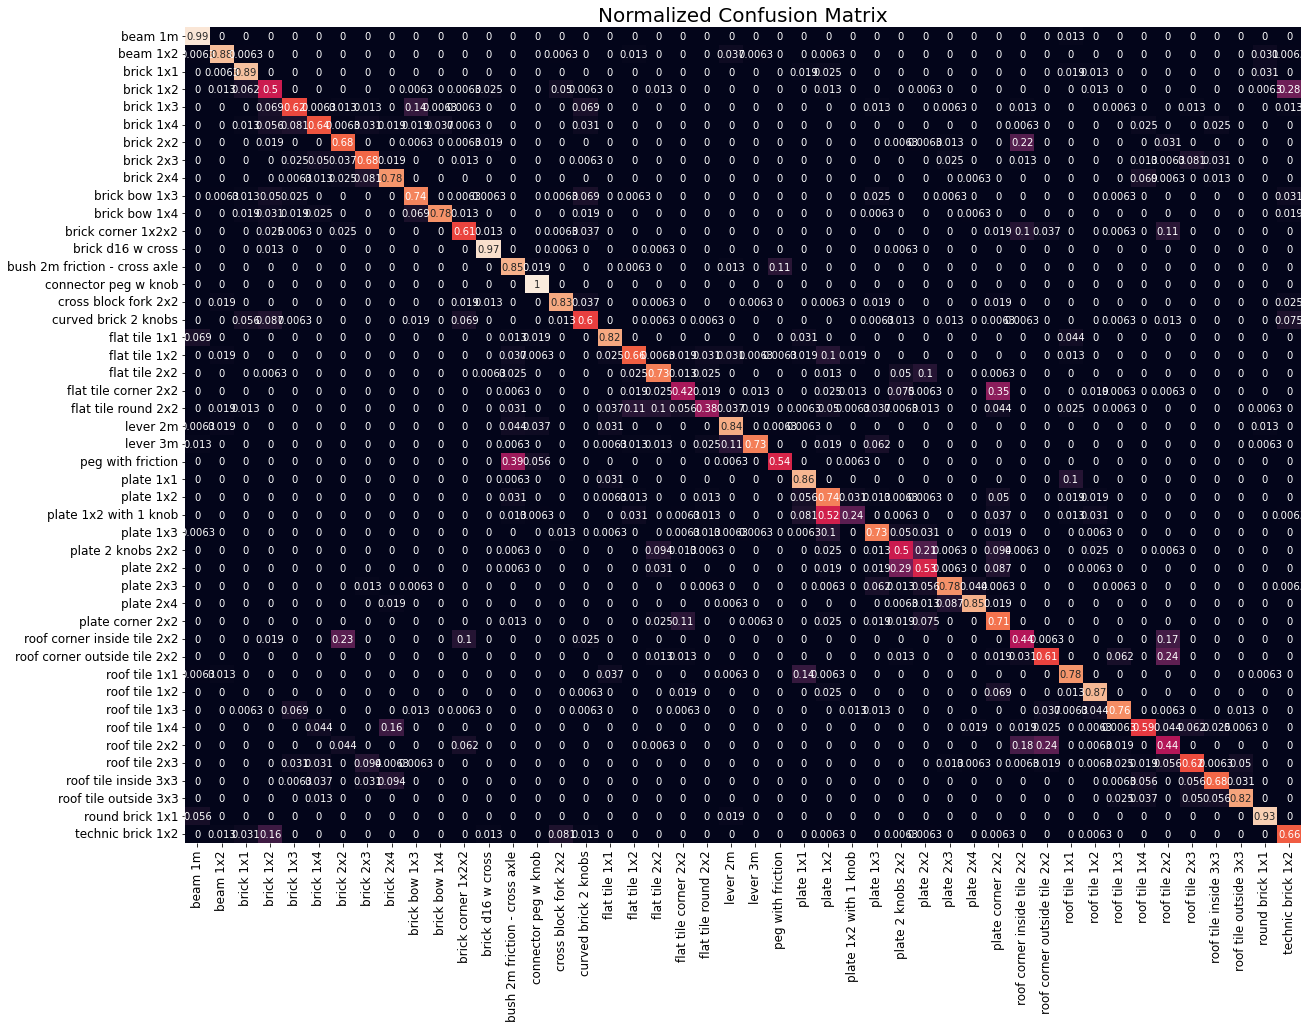

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
cf_matrix = confusion_matrix(y_test, pred, normalize='true')
plt.figure(figsize = (20,15))
sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)),cbar=False)
plt.title('Normalized Confusion Matrix', fontsize = 20)
plt.xticks(fontsize=12,rotation=90)
plt.yticks(fontsize=12)
plt.show()

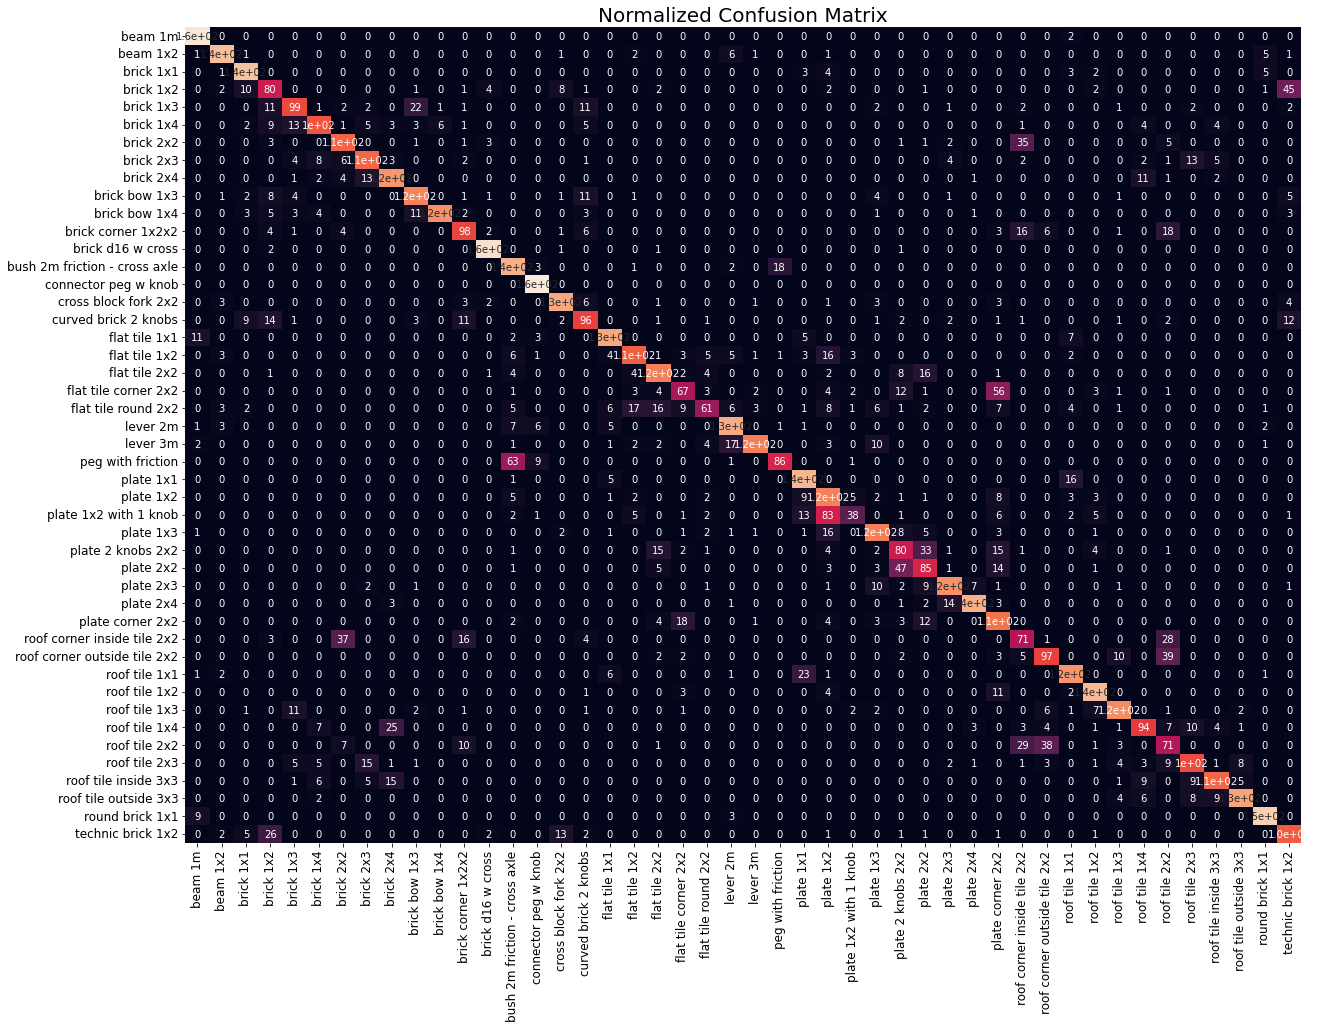

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
cf_matrix = confusion_matrix(y_test, pred)
plt.figure(figsize = (20,15))
sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)),cbar=False)
plt.title('Normalized Confusion Matrix', fontsize = 20)
plt.xticks(fontsize=12,rotation=90)
plt.yticks(fontsize=12)
plt.show()

In [31]:
from sklearn import metrics
print(metrics.classification_report(y_test,pred))

                               precision    recall  f1-score   support

                      beam 1m       0.86      0.99      0.92       160
                     beam 1x2       0.88      0.88      0.88       160
                    brick 1x1       0.80      0.89      0.84       160
                    brick 1x2       0.48      0.50      0.49       160
                    brick 1x3       0.69      0.62      0.65       160
                    brick 1x4       0.75      0.64      0.69       160
                    brick 2x2       0.64      0.68      0.66       160
                    brick 2x3       0.72      0.68      0.70       160
                    brick 2x4       0.71      0.78      0.75       160
                brick bow 1x3       0.73      0.74      0.73       160
                brick bow 1x4       0.95      0.78      0.85       160
           brick corner 1x2x2       0.66      0.61      0.64       160
            brick d16 w cross       0.91      0.97      0.94       160
bush 

In [34]:
model.save('lego.h5')

In [33]:
model.save_weights('lego.h5')

In [59]:
from keras.preprocessing import image
img = image.load_img('C:/Users/tapak/Downloads/s-l225.jpg', target_size=(50, 50))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=32)
pred = np.argmax(classes,axis=1)
print(pred)

[8]
